# Lab 1
Today: 
1. Linear regression
1. Overview of Pandas library: creation, exploration and vizualization of the data
1. Hypothesis testing: parametric vs non parametric, paired vs non paired

# Step 1. Linear regression

We first create a fake dataset with some random noise

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

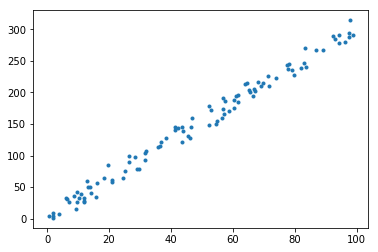

In [2]:
np.random.seed(0) # fix seed for reproducability
x = np.random.uniform(0., 100., 100) # np.random.uniform(low, high, n)
y = 3. * x + 2. + np.random.normal(0., 10., 100) # np.random.normal(mean, sigma, n)
plt.plot(x, y, '.');

Add column of 1's for intercept.

In [3]:
import statsmodels.api as sm
# add constant for intercept
x = sm.add_constant(x)

Use statsmodels implementation of Ordinary Least Squares.

In [4]:
model = sm.OLS(y,x)
res = model.fit()
print(res.params)
print(res.rsquared)

[ 4.22151077  2.9936935 ]
0.986852382137


Let's now plot the line along with the error (+/- sigma).

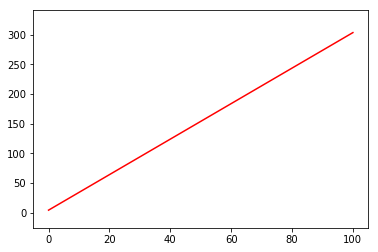

In [5]:
def line(x, a, b):
    return a * x + b
e = np.repeat(10., 100)
plt.errorbar(x[:,1], y, yerr=e, fmt="none")
xfine = np.linspace(0., 100., 100)  # define values to plot the function for
plt.plot(xfine, line(xfine, res.params[1], res.params[0]), 'r-');

### Exercise 1
1. Implement closed formula solution fo the parameters of Linear Regression (from lecture notes). 
1. Implement formula for coefficient of determination (R-squared)

Feel free to use any library, as default - use [numpy.linalg](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html).

Compare results with OLS method.

In [8]:
# here goes your solution for LR parameters
myTheta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y).reshape(x.shape[1],1)
print('Weights:')
print(myTheta)

Weights:
[[ 4.22151077]
 [ 2.9936935 ]]


In [10]:
# here goes your solution for R-squared
predictedY = x.dot(myTheta)
varianceNum = (predictedY - np.mean(y)).T.dot((predictedY - np.mean(y))).sum()
varianceDenom = (y - np.mean(y)).T.dot((y - np.mean(y))).sum()
R_sq = varianceNum/varianceDenom
print('R-squared = %f' %R_sq)

R-squared = 0.986852


# Step 2. Data representation and interaction

**Pandas** in an open-source python package that is great for data structuring, preparation and analysis.

Features:
- Unified data representation using *DataFrame* objects - 2D heterogeneous tables with labeled axes;
- Database-like operations: join, union(append), group by, sort, column selection, filtering;
- Advanced operations: pivoting, reshaping, multi-indexing;
- Basic statistics: count, mean, std, min/max, quantiles;
- Vizualization with matplotlib.

## 1. Dataframe creation
Create dataframe by reading a csv file with brain size data (analyzed [here](https://www.researchgate.net/profile/Robert_Schultz2/publication/222881180_In_vivo_brain_size_and_intelligence_Intelligence_15_223-228/links/00b4952d94932772d4000000.pdf)).
The csv contains following columns:
1. Gender: Male or Female
1. FSIQ: Full Scale IQ scores 
1. VIQ: Verbal IQ scores 
1. PIQ: Performance IQ scores 
1. Weight: body weight in pounds
1. Height: height in inches
1. MRI_Count: total pixel Count from the 18 MRI scans

In [11]:
import pandas as pd
data = pd.read_csv('examples/brain_size.csv', sep=';', na_values=".")
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


It is also possible to create dataset from dictionary

In [12]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [13]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t}).head()

,cos,sin,t
0,0.960170,0.279415,-6.000000
1,0.609977,0.792419,-5.368421
2,0.024451,0.999701,-4.736842
3,-0.570509,0.821291,-4.105263
4,-0.945363,0.326021,-3.473684


## 2. Data exploration
Let's consider simple operations to operate with dataframe.

In [14]:
data.shape

(40, 8)

In [15]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

To get one column from DataFrame it is possible to use `[]` with the column name.

In [16]:
data['Gender'] .head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: Gender, dtype: object

You can also use boolean indexing to filter rows. For example to compute the *mean value* of verbal IQ score for females it is possible to use the following line:

In [17]:
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

To get simple statistics for each column use `descibe` function:

In [18]:
data.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


The `groupby` operation allows to split dataframe into groups. 

It returns `GroupBy` object which can be used to apply a function for each group separately ([more](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-grouping) documentation on grouping).

In [19]:
groupby_gender = data.groupby('Gender')
groupby_gender['VIQ'].mean()

Gender
Female    109.45
Male      115.25
Name: VIQ, dtype: float64

In [20]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


### Exercise 2
	•	What is the mean value for VIQ for the full population?
	•	How many males/females were included in this study? 
	•	What is the average value of MRI counts expressed in log units, for males and females?
**Hint**: use ‘tab completion’ to find out the methods that can be called, instead of `mean` in the above example.

In [21]:
# print mean VIQ for the full population
data['VIQ'].mean()

112.35

In [22]:
# print the numbers of males and females
print('Number of males is %d' %(data[data['Gender']=='Male'].shape[0]))
print('Number of females is %d' %(data[data['Gender']=='Female'].shape[0]))

Number of males is 20
Number of females is 20


In [29]:
# print average MRI counts in log units for each gender
print('Log10 of average MRI for males is %f' %np.log10(data[data['Gender']=='Male']['MRI_Count'].mean()))
print('Log10 of average MRI for females is %f' %np.log10(data[data['Gender']=='Female']['MRI_Count'].mean()))

Log10 of average MRI for males is 5.979938
Log10 of average MRI for males is 5.935837


## 3. Data visualization
Let's use pandas plotting to make simple boxplots and 3x3 matrix of scatter plots for 3 columns.

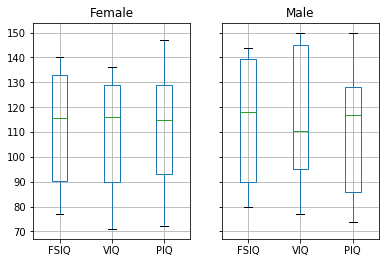

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
# Box plots of different columns for each gender
groupby_gender = data.groupby('Gender')
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])
plt.show()

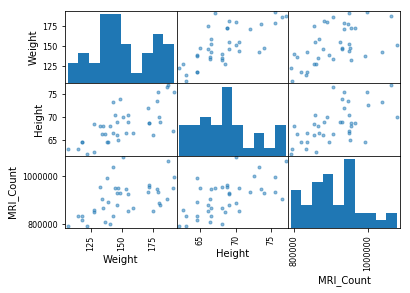

In [32]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
plt.show()

In [ ]:
scatter_matrix(data[['FSIQ', 'VIQ', 'PIQ']])
plt.show()

### Exercise 3

Plot the scatter matrix for males only, and for females only. 

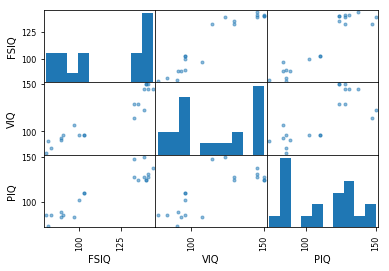

In [33]:
# scatter matrix for males 
scatter_matrix(data[data['Gender']=='Male'][['FSIQ', 'VIQ', 'PIQ']])
plt.show()

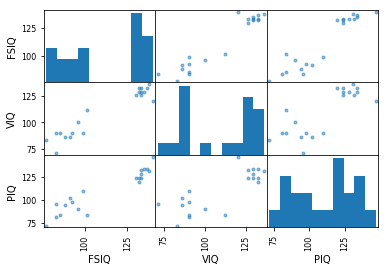

In [34]:
# scatter matrix for females 
scatter_matrix(data[data['Gender']=='Female'][['FSIQ', 'VIQ', 'PIQ']])
plt.show()

# Step 3. Hypothesis testing: comparing two groups

Simple statistical test can be done using `scipy.stats` package (see [more](http://www.scipy-lectures.org/intro/scipy.html#scipy)).

In [35]:
from scipy import stats

Student’s t-test: the simplest statistical test
=========

1-sample t-test: testing the value of a population mean
------

![norm](http://www.scipy-lectures.org/_images/two_sided.png)

`scipy.stats.ttest_1samp()` tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean).

It returns the T-statistic, and the p-value (see [more](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp)):


In [36]:
stats.ttest_1samp(data['VIQ'], 0) 

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

**Tip**: With a p-value of $10^{-28}$ we can claim that the population mean for the verbal IQ score is not 0.



2-sample t-test: testing for difference across populations
--------

We have seen above that the mean `VIQ` in the male and female populations were different. To test if this is significant, we do a 2-sample t-test with `scipy.stats.ttest_ind()`:


In [37]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)   

Ttest_indResult(statistic=-0.77261617232750113, pvalue=0.44452876778583217)

Can we claim that male and female mean value of `VIQ` are significantly different?

As p-value is great enough, this statement cannot be claimed

Paired tests: repeated measurements on the same individuals
------
`PIQ`, `VIQ`, and `FSIQ` give 3 measures of IQ. Let us test if `FSIQ` and `PIQ` are significantly different. We can again use a 2 sample test:

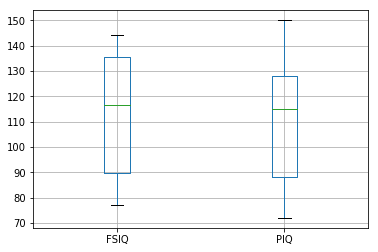

In [38]:
data.boxplot(column=['FSIQ', 'PIQ']);

In [39]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

Ttest_indResult(statistic=0.46563759638096403, pvalue=0.64277250094148408)

The problem with this approach is that it forgets that there are links between observations: FSIQ and PIQ are measured on the same individuals. Thus the variance due to inter-subject variability is confounding, and can be removed, using a “paired test”, or “repeated measures test”:


In [40]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])   

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

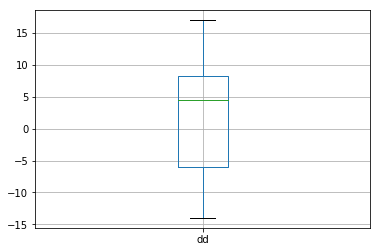

In [41]:
data['dd'] = data['FSIQ'] - data['PIQ']
data.boxplot(column=['dd']);

This is equivalent to a 1-sample test on the difference:

In [42]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)   

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption:

In [43]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])  

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

**Note**: The corresponding test in the non-paired case is the Mann–Whitney U test,  `scipy.stats.mannwhitneyu()`.

### Exercise 4
	•	Test the difference between weights in males and females.
	•	Test the difference between VIQ in males and females without the assumption of Gaussian error.

In [50]:
# difference in weigth between genders?
female_weight = data[data['Gender'] == 'Female']['Weight']
male_weight = data[data['Gender'] == 'Male']['Weight']
stats.ttest_ind(female_weight, male_weight, nan_policy='omit')   

Ttest_indResult(statistic=-4.8709509219406959, pvalue=2.2272930183621212e-05)

In [57]:
# difference in VIQ between genders (don't assume Gaussian errors)
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.wilcoxon(male_viq, female_viq)  

WilcoxonResult(statistic=82.5, pvalue=0.40071152819253142)